 # Importing Libraries

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load Dataset

In [204]:
df = pd.read_csv("CustomerChurn.csv")
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 # Data Preprocesssing

In [207]:
print(df.columns)

Index(['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


In [209]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing TotalCharges
df = df[df['Total Charges'] != " "]

# Convert TotalCharges to float
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

# Drop CustomerID (not useful for prediction)
df.drop('Customer ID', axis=1, inplace=True)

# Encode categorical columns
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Standardize numerical columns
scaler = StandardScaler()
df[['Tenure', 'Monthly Charges', 'Total Charges']] = scaler.fit_transform(df[['Tenure', 'Monthly Charges', 'Total Charges']])

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


 # Exploratory Data Analysis (EDA)

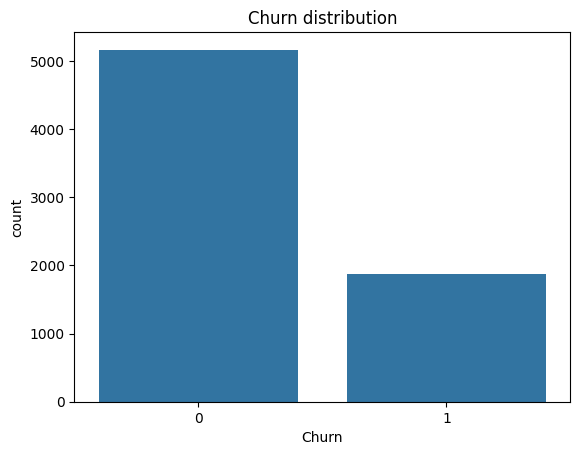

In [212]:
# Churn Distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn distribution')
plt.show()

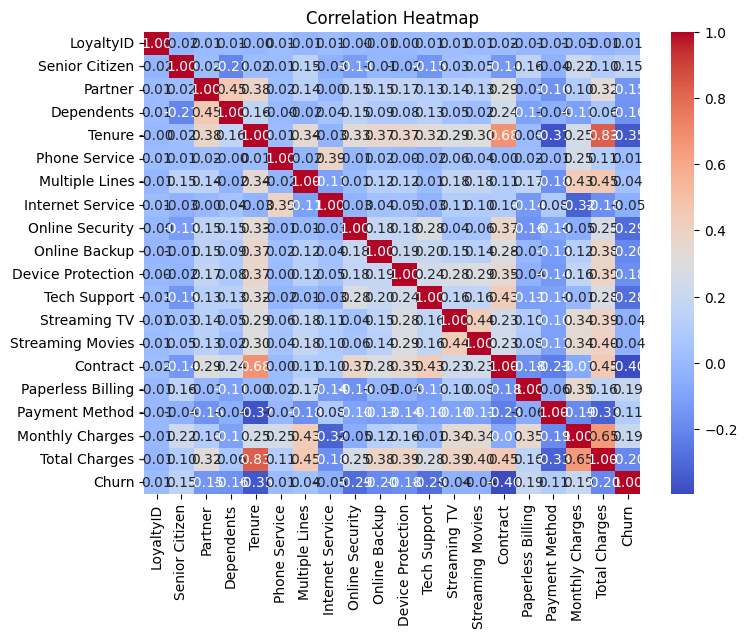

In [245]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

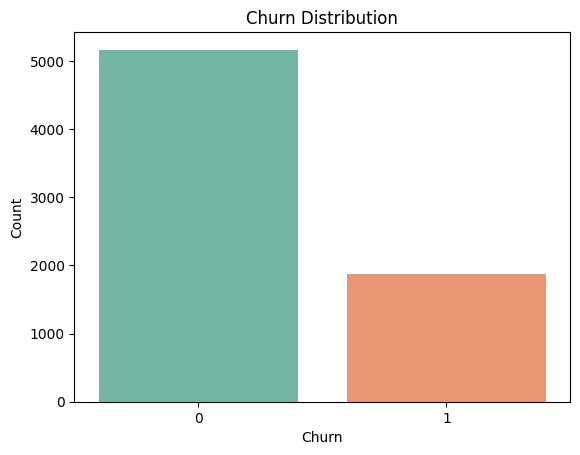

In [215]:
#Churned vs retained customers
sns.countplot(x='Churn', data=df, palette='Set2', hue="Churn", legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

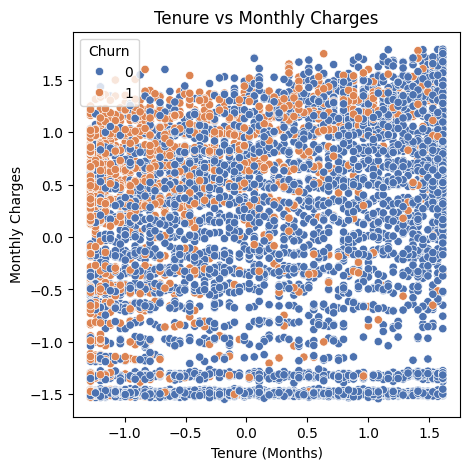

In [235]:
# Customer Tenture vs Monthly Charges

plt.figure(figsize=(5, 5))
sns.scatterplot(x='Tenure', y='Monthly Charges', hue='Churn', data=df)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

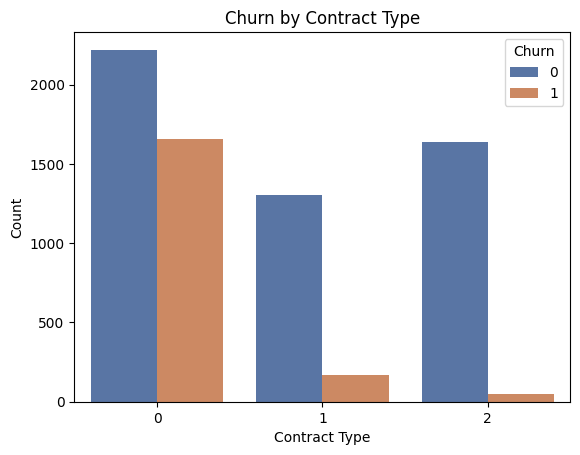

In [239]:
# Compare Churn rates across different contract types

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

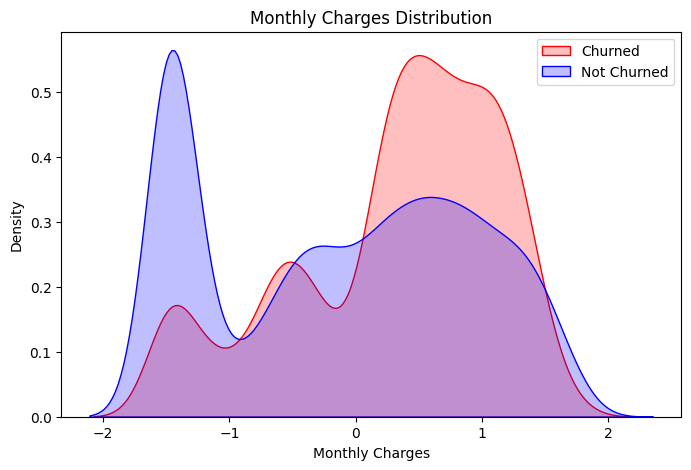

In [255]:
#Visualize the distribution of monthly charges for churned and retained customers

plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Churn'] == 1]['Monthly Charges'], label='Churned', fill=True, color="red")
sns.kdeplot(df[df['Churn'] == 0]['Monthly Charges'], label='Not Churned', fill=True, color="blue")
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.legend()
plt.show()

# Feature Engineering

In [276]:
#Features and target variable 
x = df.drop('Churn', axis=1)
y = df['Churn']

#Train-test split
X_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

In [283]:
#Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Predict on test data
y_pred = rf_model.predict(X_test)

# Model Evaluation

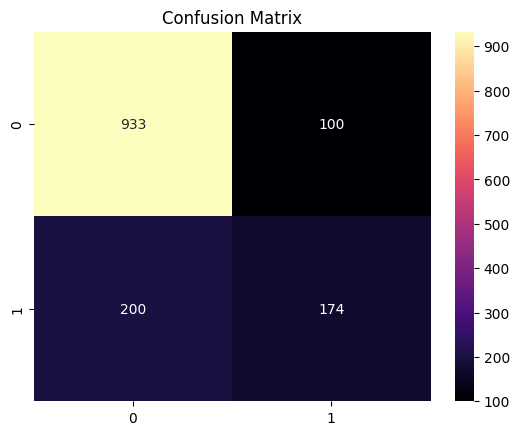

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407

ROC-AUC Score: 0.8196701368217796


In [342]:
#Evaluate the model using classification metrics
#Confusion Matrix

conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt='d',cmap='magma')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print(classification_report(Y_test, y_pred))

#ROC-AUC Score

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(Y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_score}')

# Save and Deploy the Model

In [347]:
# Save and Deploy the Model

import joblib

#Save the model
joblib.dump(rf_model, 'churn_model.pkl')

#Load the model
loaded_model = joblib.load('churn_model.pkl')